# Sensitivity Analysis in Python

This guide is organized in the following sections:

- [**Sensitivity Analysis Theory**](#What-is-Sensitivity-Analysis%3F)
- [**The Hard Way**](#How-to-Do-Sensitivity-Analysis-in-Python%3F)
- [**The Easy Way (use `sensitivity`)**](#Using-The-Sensitivity-Library)

## What is Sensitivity Analysis?

Sensitivity Analysis is the process of passing different inputs to a model to see how the outputs change. It differs from Monte Carlo Simulation in that no probability distributions are assigned to the inputs, and typically larger ranges of the inputs are chosen. The purpose of Sensitivity Analysis is to understand how the outputs change over the full range of possible inputs. Sensitivity Analysis does not derive any expected outcome or a probability distribution of outcomes, instead returning a range of possible output values associated with each set of inputs.

The general process for Sensitivity Analysis is as follows:

For the model given by:

$$y = f(X)$$
$$X = [x_1, x_2, ..., x_n]$$

Where:

- $y$: Model output
- $X$: Model input matrix
- $x_i$ Value if $i$th $x$ variable

Follow the following steps:

- Choose a set of values for each $x_i$
- Take the cartesian product of these values as $[X_1, X_2, ..., X_m]$
- For each $X_i$, calculate $y_i = f(X_i)$
- Store the values of $X_i$ mapped to $y_i$
- Visualize $y_i$ versus $X_i$

## How to Do Sensitivity Analysis in Python?


Abstract algorithms are great, but let's see the code that can make this happen. First we'll import pandas to use later and define a function which represents the model:

In [1]:
import pandas as pd

def my_model(x_1, x_2):
    """
    Represents f from above
    """
    return x_1 ** x_2

We can run this model once to get a single result:

In [2]:
y = my_model(2, 4)
y

16

Now let's go step by step through the above algorithm. First let's choose a set of values for each $x_i$:

In [3]:
x1_values = [10, 20, 30]
x2_values = [1, 2, 3]

While we can use `itertools.product` to take a cartesian product of an arbitrary number of inputs, a more straightforward approach is to use nested for loops. A for loop within a for loop will run with each combination of the inputs.

In [4]:
for x1 in x1_values:
    for x2 in x2_values:
        print(x1, x2)

10 1
10 2
10 3
20 1
20 2
20 3
30 1
30 2
30 3


Now we have each $X_i$, we need to calculate $y_i = f(X_i)$:

In [5]:
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1, x2)
        print(y_i)

10
100
1000
20
400
8000
30
900
27000


Now store the values of $X_i$ mapped to $y_i$:

In [6]:
outputs = []
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1, x2)
        outputs.append((x1, x2, y_i))
outputs

[(10, 1, 10),
 (10, 2, 100),
 (10, 3, 1000),
 (20, 1, 20),
 (20, 2, 400),
 (20, 3, 8000),
 (30, 1, 30),
 (30, 2, 900),
 (30, 3, 27000)]

Now the last is to visualize the result. We can do this with a table format through a `DataFrame`:

In [7]:
df = pd.DataFrame(outputs, columns=['x_1', 'x_2', 'y'])
df

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


We can add some styling to the DataFrame to highlight the high and low values:

In [8]:
df.style.background_gradient(subset='y', cmap='RdYlGn')

,x_1,x_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


We can plot the result as well with a hex-bin plot.

/home/nick/.local/share/virtualenvs/fin-model-course-eIFMSc8A/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/nick/.local/share/virtualenvs/fin-model-course-eIFMSc8A/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/nick/.local/share/virtualenvs/fin-model-course-eIFMSc8A/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subp

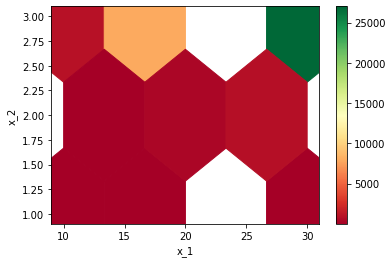

In [9]:
df.plot.hexbin(x='x_1', y='x_2', C='y', gridsize=3, cmap='RdYlGn', sharex=False)

## Using The Sensitivity Library

The `sensitivity` package is designed around making this whole process easier. It is also able to handle more than two varying inputs with ease. The basic usage is to construct a dictionary where the keys are the names of inputs in a function and values are iterables of the values for that input. Then this dictionary is passed to `SensitivityAnalyzer` along with the function. The rest is handled for you. 

In [10]:
from sensitivity import SensitivityAnalyzer

sensitivity_dict = {
    'x_1': [10, 20, 30],
    'x_2': [1, 2, 3]
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model)

Now that we have created the `SensitivityAnalyzer` object, it has finished the sensitivity analysis. We can view a `DataFrame` with the results at `.df`:

In [11]:
sa.df

,x_1,x_2,Result
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


We can also get the hex-bin plot and styled DataFrame: 

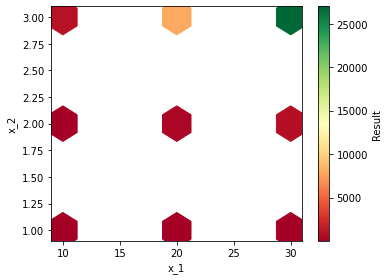

In [12]:
plot = sa.plot()

In [13]:
styled = sa.styled_dfs()

,1,2,3
x_1,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


When creating the `SensitivityAnalyzer` object, you can pass other options for formatting the outputs:

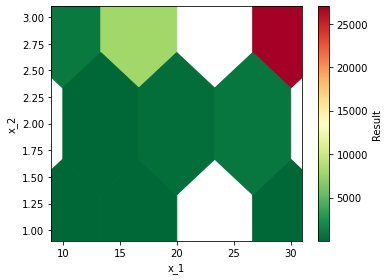

In [14]:
sa = SensitivityAnalyzer(sensitivity_dict, my_model, grid_size=3, reverse_colors=True)
plot = sa.plot()

In [15]:
styled = sa.styled_dfs()

,1,2,3
x_1,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


This all works with more than two inputs as well. In that case we will get multiple pair-wise plots and styled `DataFrame`s:

In [16]:
def my_model_2(x_1, x_2, x_3):
    return x_1 * x_2 ** x_3

sensitivity_dict = {
    'x_1': [1, 2, 3],
    'x_2': [4, 5, 6],
    'x_3': [7, 8, 9]
}

sa = SensitivityAnalyzer(sensitivity_dict, my_model_2, grid_size=3)

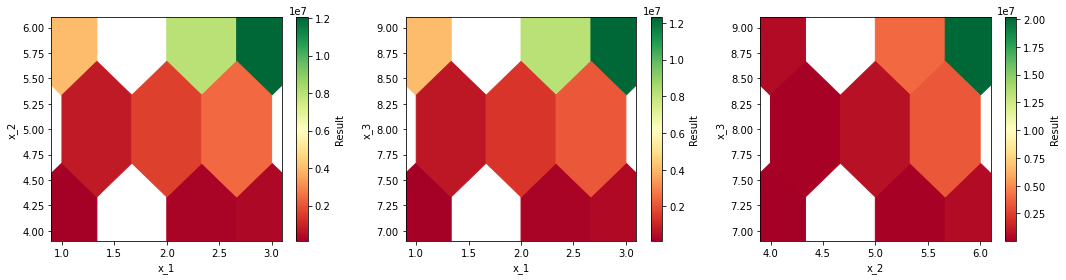

In [17]:
plot = sa.plot()

In [18]:
styled_dict = sa.styled_dfs()

,4,5,6
x_1,,,
1,114688.000000,807291.666667,4012416.000000
2,229376.000000,1614583.333333,8024832.000000
3,344064.000000,2421875.000000,12037248.000000


,7,8,9
x_1,,,
1,124815.000000,711925.666667,4097655.000000
2,249630.000000,1423851.333333,8195310.000000
3,374445.000000,2135777.000000,12292965.000000


,7,8,9
x_2,,,
4,32768.000000,131072.000000,524288.000000
5,156250.000000,781250.000000,3906250.000000
6,559872.000000,3359232.000000,20155392.000000


The plot is still a single `Figure` object, but the `styled_dfs` produces a dictionary where there are more than two inputs. The keys of the dictionary are a tuple of the column names involved in the `Styler`, and the values are the `Styler`s.

In [19]:
styled_dict

{('x_1', 'x_2'): <pandas.io.formats.style.Styler at 0x7f0df1fac0b8>,
 ('x_1', 'x_3'): <pandas.io.formats.style.Styler at 0x7f0dee6fb6d8>,
 ('x_2', 'x_3'): <pandas.io.formats.style.Styler at 0x7f0dee4f1278>}